In [1]:
%run "../Eigendecomposition_Source_Code.ipynb"

Loading: Eigendecomposition_Source_Code.ipynb...
Done at: 2023/08/29 10:21:01


# <font color="green">Functions

In [2]:
def createPlots2(sd):
    # creates plots for spikedata analysis including: ISI hist, firing rate hist and layout, and Spikeraster of first 30 seconds
    firing_rates = calculate_mean_firing_rates(sd)
    seconds=30 # seconds to display raster
    neuron_x = []
    neuron_y = []
    
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron["position"][0])
        neuron_y.append(neuron["position"][1])
    
    # Plot main figure --------------------------------------------------------------------
    figs, plots = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
    figs.suptitle(f"Plots of snipped recording:", ha="center")
    
    # Plot ISI Histogram subplot
    plots[0,0].hist(ISI(sd), bins=50);
    plots[0,0].set_title("Interspike Interval of Recording")
    plots[0,0].set_xlabel("Time bin(ms)")
    plots[0,0].set_ylabel("ISI count")
    
    # Plot Firing Rates Histogram subplot
    plots[0,1].hist(firing_rates);
    plots[0,1].set_title("Average Firing Rate for Neural Units") 
    plots[0,1].set_xlabel("Firing Rate(ms)")
    plots[0,1].set_ylabel("Unit Count") 
    
    # Plot Neuron Firing Rate Layout subplot
    plots[1,0].scatter(neuron_x, neuron_y, s=firing_rates*100, c="red", alpha=0.3)
    #plots[1,0].scatter(neuron_x, neuron_y, s=(2**firing_rates)*10, c="red", alpha=0.3)
    plots[1,0].set_title("Neuron Firing Rate Across MEA")
    plots[1,0].set_xlabel("um")
    plots[1,0].set_ylabel("um")
    #plots[3] = Firing_Rate_Layout(sd);
    
    
    # Plot Raster with plotted firing rate over time subplot
    # Zoomed Raster and pop rate
    # Get coordinates for raster
    idces, times = sd.idces_times()
    
    # Get population rate for everything
    pop_rate = sd.binned(bin_size=1)# in ms
    # Lets smooth this to make it neater
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
    t = np.linspace(0,sd.length,pop_rate.shape[0])/1000
    
    plots[1,1].scatter(times/1000,idces,marker='|',s=1)
    plots2 = plots[1,1].twinx()
    plots2.plot(t,pop_rate_smooth,c='r')

    plots[1,1].set_xlim(0,seconds)
    plots[1,1].set_title("Spike Raster Analysis")
    plots[1,1].set_xlabel("Time(s)")
    plots[1,1].set_ylabel("Unit #")
    plots2.set_ylabel("Firing Rate")
    
    # Plot second figure ------------------------------------------------------------------
    figs2, axs = plt.subplots(nrows=2,ncols=4,figsize=(30,10)) 
    figs2.suptitle(f"Interspike Interval of Individual Neural Units of Snipped Data")
    
    for i in range(8): # Plot individual ISI figures
        if(i < sd.N):
            if i < 4: # First Row
                axs[0,i].hist(IndivISI(sd, i))
                axs[0,i].set_title(f"Interspike Interval of Neural Unit {i}")
                axs[0,i].set_xlabel("Time bin(ms)")
                axs[0,i].set_ylabel("ISI count")
            else: # Second Row
                axs[1,i-4].hist(IndivISI(sd, i))
                axs[1,i-4].set_title(f"Interspike Interval of Neural Unit {i}")
                axs[1,i-4].set_xlabel("Time bin(ms)")
                axs[1,i-4].set_ylabel("ISI count")
        else: # Print warning title in case neuron count is uner 8
            figs2.suptitle(f"Interspike Interval of Individual Neural Units of File {filename}\n Note: Neuron Count Under 8 ({sd.N})")
            
def EigenLayoutsDisplay(sd, showamount=5):
    corr = correlation(sd)
    sttc = get_sttc(sd)
    Wcorr, Ucorr = eigenvalues_eigenvectors(corr)
    Wsttc, Usttc = eigenvalues_eigenvectors(sttc)
    
    #firing_rates = calculate_mean_firing_rates(sd)
    
    neuron_x = []
    neuron_y = []
    
    for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
        neuron_x.append(neuron['position'][0])

        neuron_y.append(neuron['position'][1])
        
    figs, axs = plt.subplots(nrows=2,ncols=showamount,figsize=(12*showamount,12))
    figs.suptitle("First Five Eigenvector Layouts")
    
    for i in range(showamount):
        pltA = axs[0,i].scatter(neuron_x,neuron_y, c=Ucorr[:,i], cmap = plot_color)
        #pltA = axs[0,i].scatter(neuron_x,neuron_y, s=firing_rates*20, c=Ucorr[:,i], cmap = plot_color)
        axs[0,i].set_title(f"Corr Eigenvector #{i+1}")
        axs[0,i].set_xlabel("um")
        axs[0,i].set_ylabel("um")
        axs[0,i].set_facecolor("grey")
        figs.colorbar(pltA, ax=axs[0,i], label="Eigen component value")
        
        pltB = axs[1,i].scatter(neuron_x,neuron_y, c=Usttc[:,i], cmap = plot_color)
        #pltB = axs[1,i].scatter(neuron_x,neuron_y, s=firing_rates*20, c=Usttc[:,i], cmap = plot_color)
        axs[1,i].set_title(f"STTC Eigenvector #{i+1}")
        axs[1,i].set_xlabel("um")
        axs[1,i].set_ylabel("um")
        axs[1,i].set_facecolor("grey")
        figs.colorbar(pltB, ax=axs[1,i], label="Eigen component value")
        
def EigenDirection(sd, selection):
    #corr = correlation(sd)
    sttc = get_sttc(sd)
    #Wcorr, Ucorr = eigenvalues_eigenvectors(corr)
    Wsttc, Usttc = eigenvalues_eigenvectors(sttc)
    
    neuron_x = []
    neuron_y = []
    
    for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
        neuron_x.append(neuron['position'][0])

        neuron_y.append(neuron['position'][1])
        
    plt.figure(figsize=(7,5)) 
    ax = plt.axes()
    ax.set_facecolor("grey")
    
    
    plt.scatter(neuron_x,neuron_y, c=Usttc[:,selection], cmap = plot_color) # color each plotted neuron according to the values of the eigenvector
    
    plt.xlabel('um')
    plt.ylabel('um')
    plt.colorbar(label="Eigen Component Value")
    plt.title("Eigenvector & Directionality")
    
    return

# Data Summary Results

Filename: hc9.19_chp-16849_plated-10.19.22_rec10.19.22_curated.zip:

Number of spikes:  31673

Length:  1269 seconds

Number of Neurons:  20

Average Firing Rate:  1.25

Coefficient of Variation:  1.304

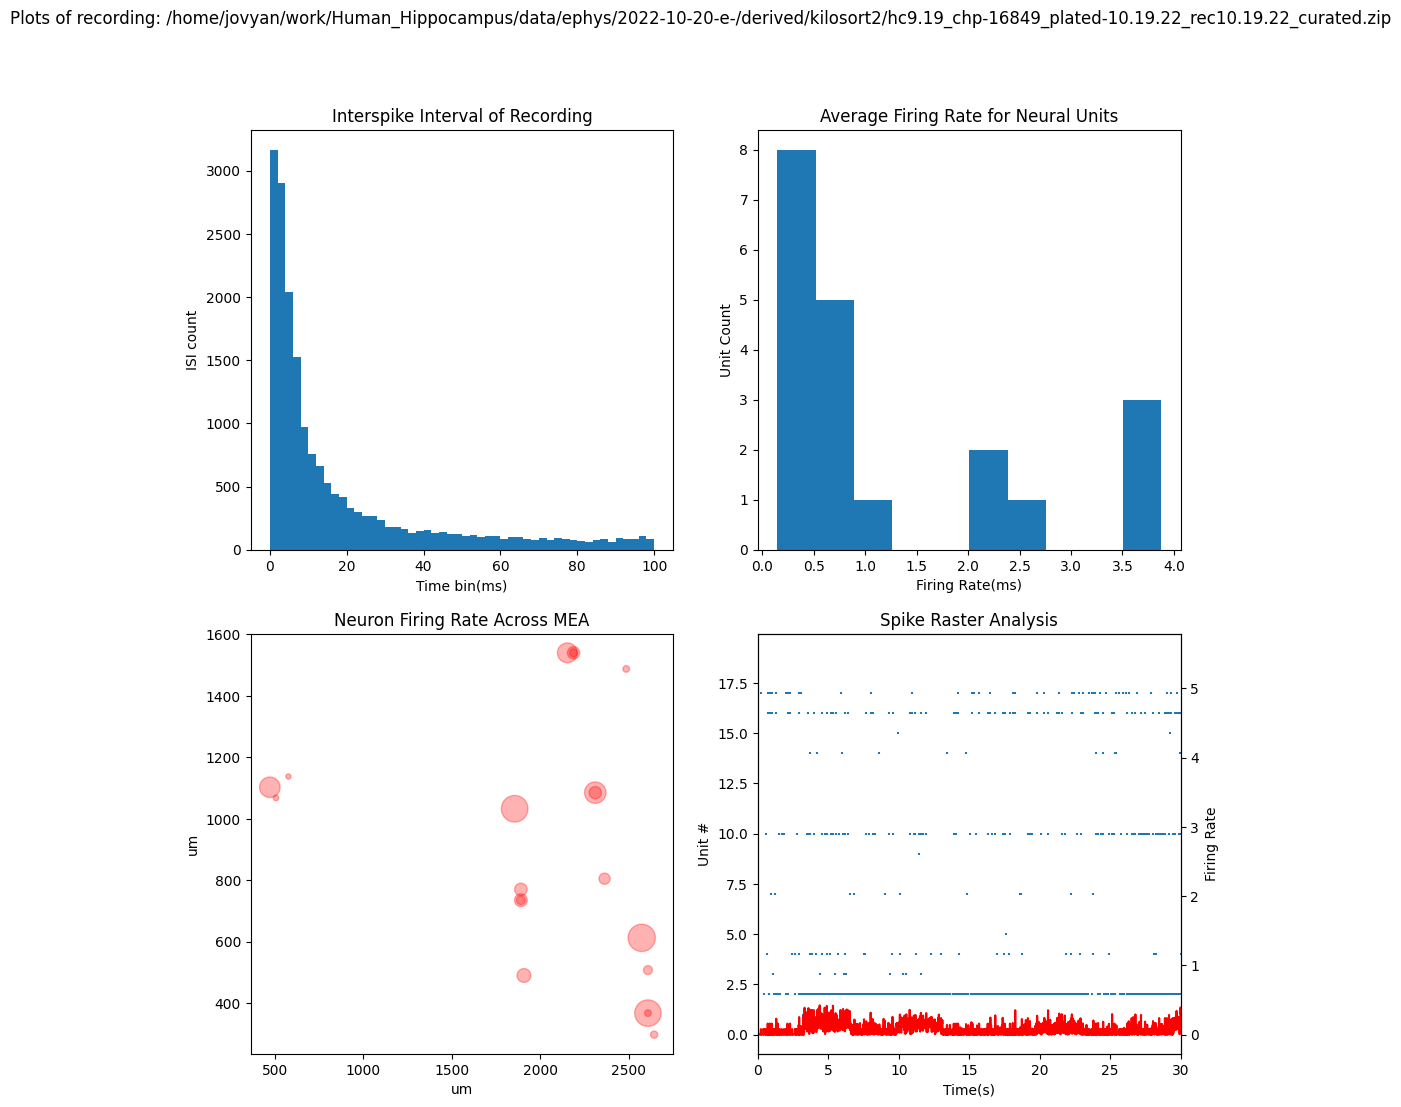
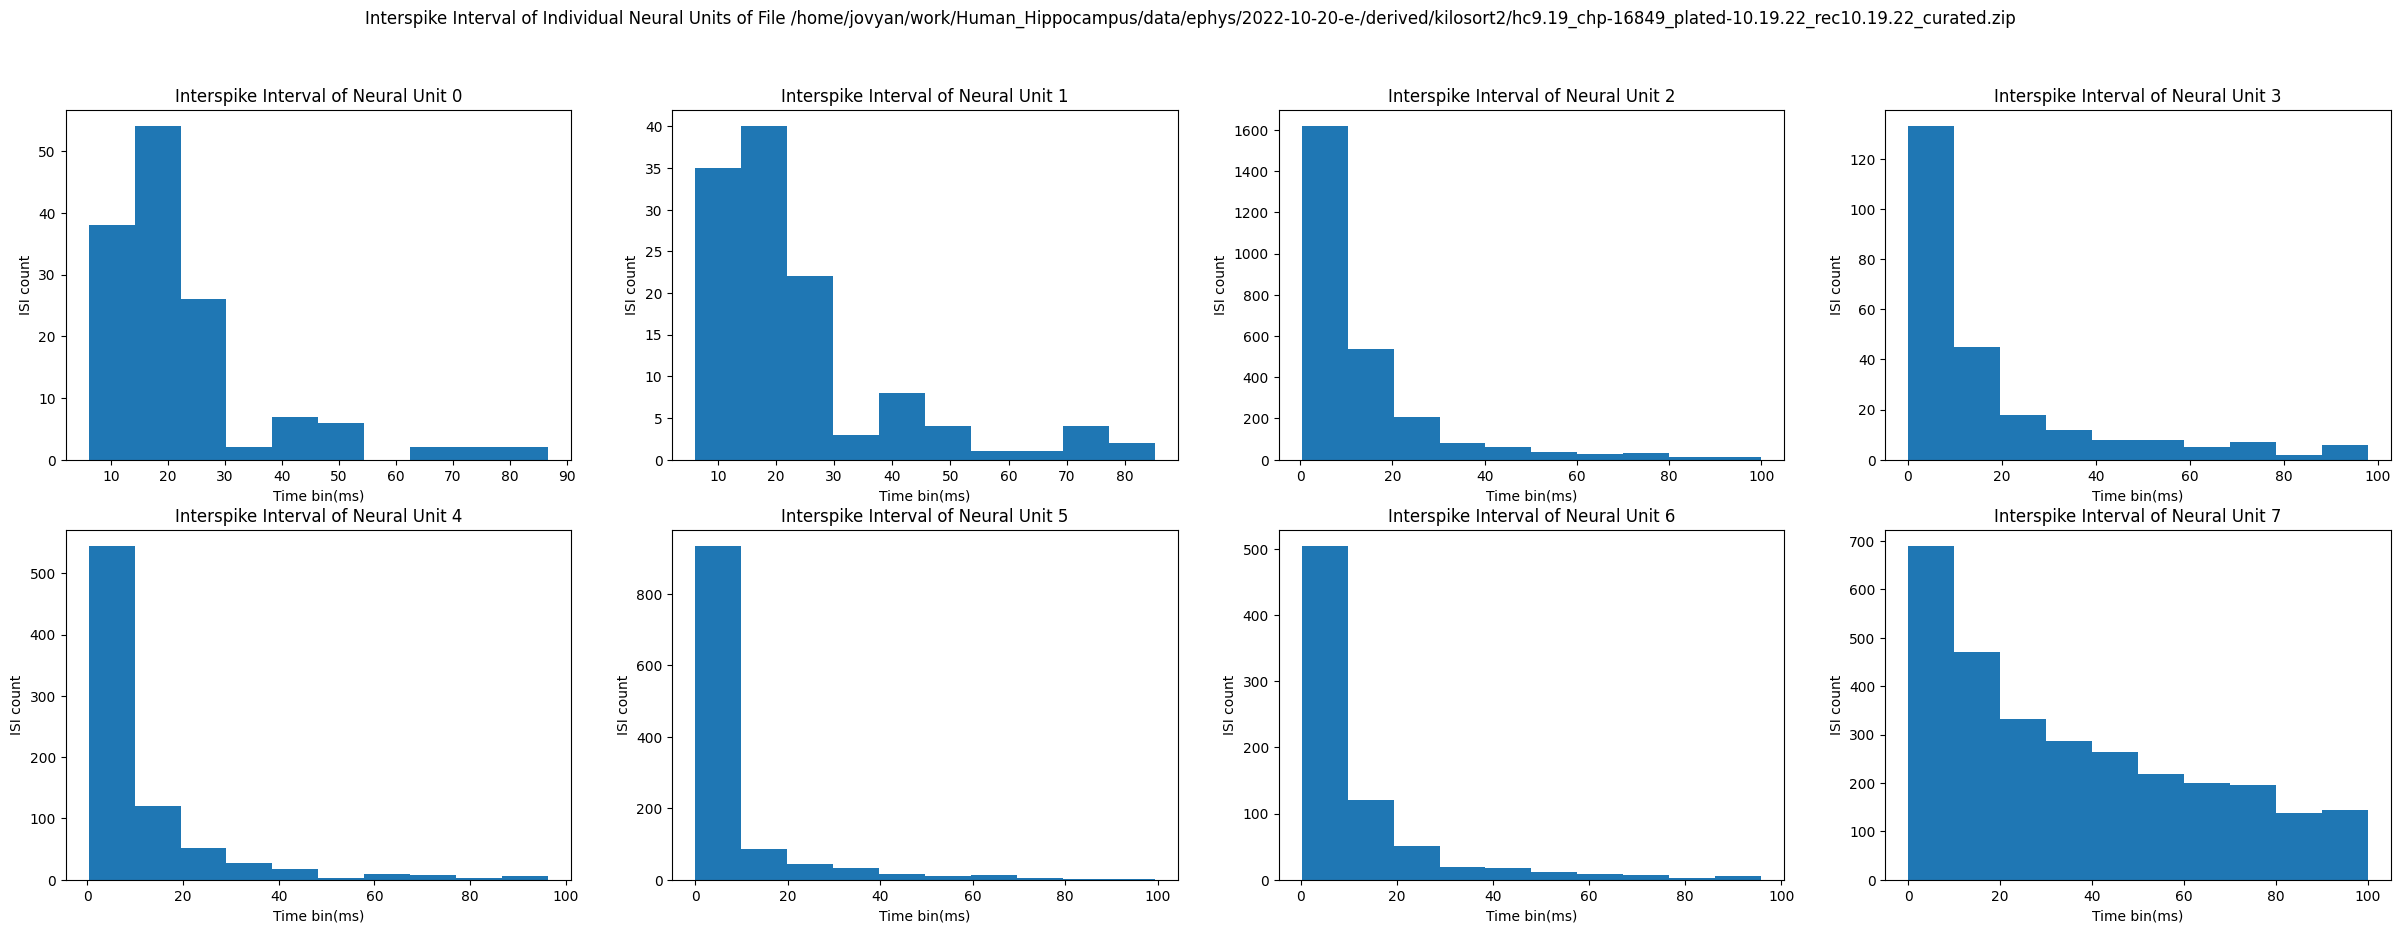

# <font color="red">Analysis 

In [22]:
sd = read_phy_files('/home/jovyan/work/Human_Hippocampus/data/ephys/2022-10-20-e-/derived/kilosort2/hc9.19_chp-16849_plated-10.19.22_rec10.19.22_curated.zip')
sds ={"Analysis--2022-10-20-e-":sd}

Corr = correlation(sd)
STTC = get_sttc(sd)
Toep = toeplitz(Corr)
    
Wcorr, Ucorr = eigenvalues_eigenvectors(Corr)
Wsttc, Usttc = eigenvalues_eigenvectors(STTC)
Wt, Ut = eigenvalues_eigenvectors(Toep)

/tmp/ipykernel_104429/3528908751.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) read_phy_files. (Prefer load_spike_data()) -- Deprecated since version 0.1.13.
  sd = read_phy_files('/home/jovyan/work/Human_Hippocampus/data/ephys/2022-10-20-e-/derived/kilosort2/hc9.19_chp-16849_plated-10.19.22_rec10.19.22_curated.zip')


## Raster Plots

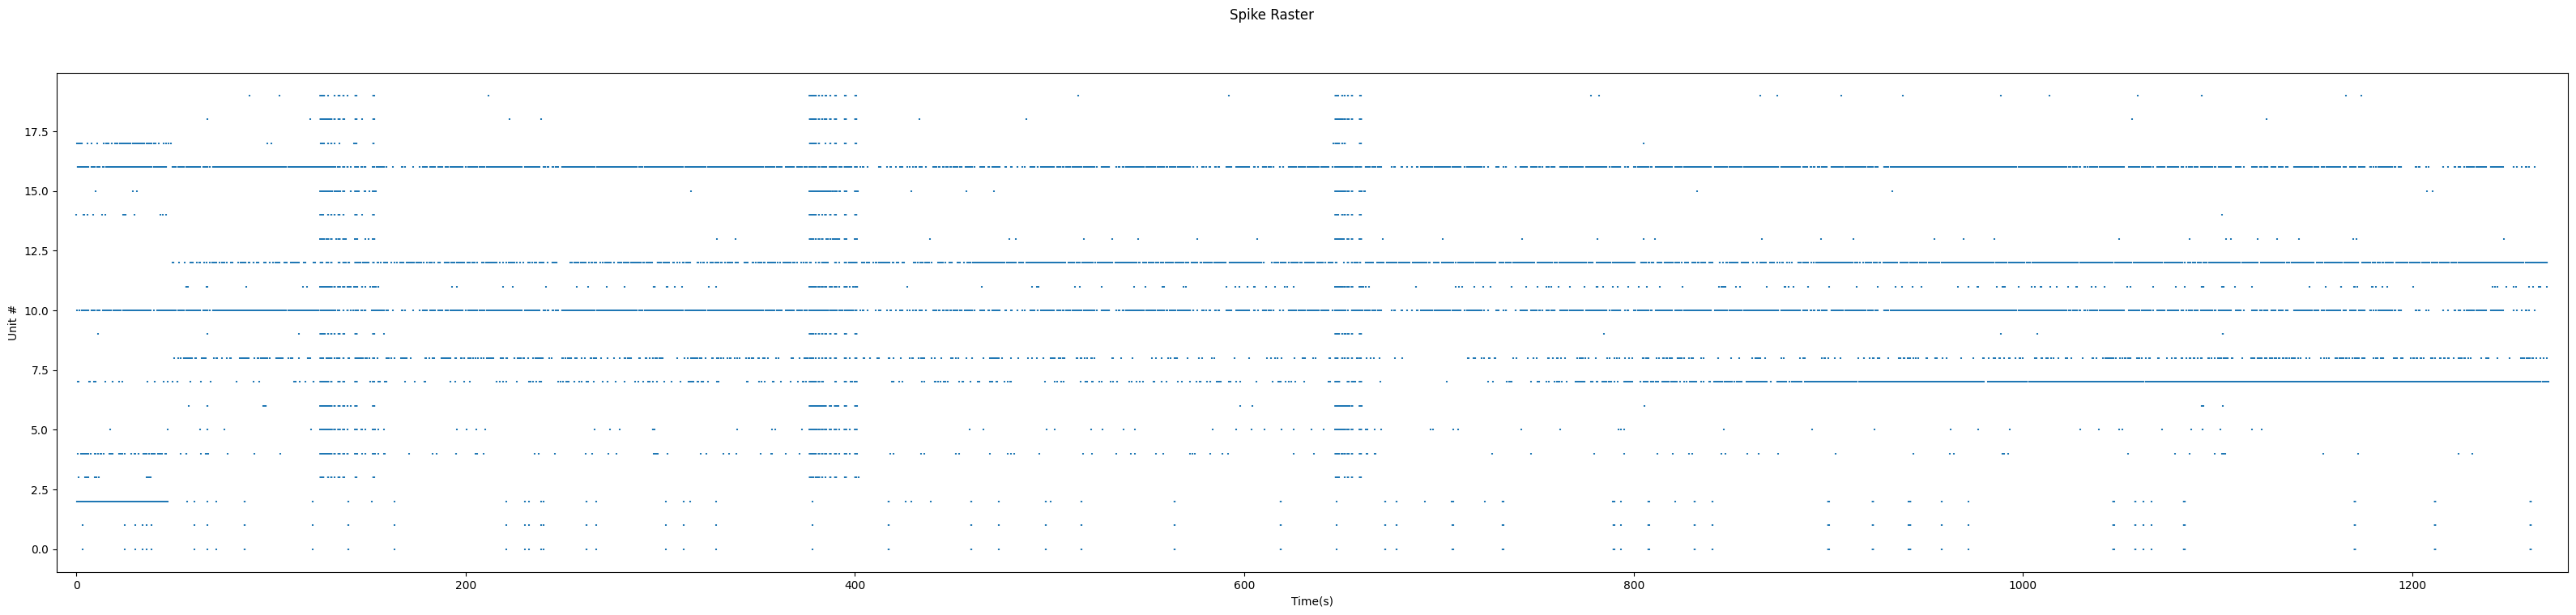

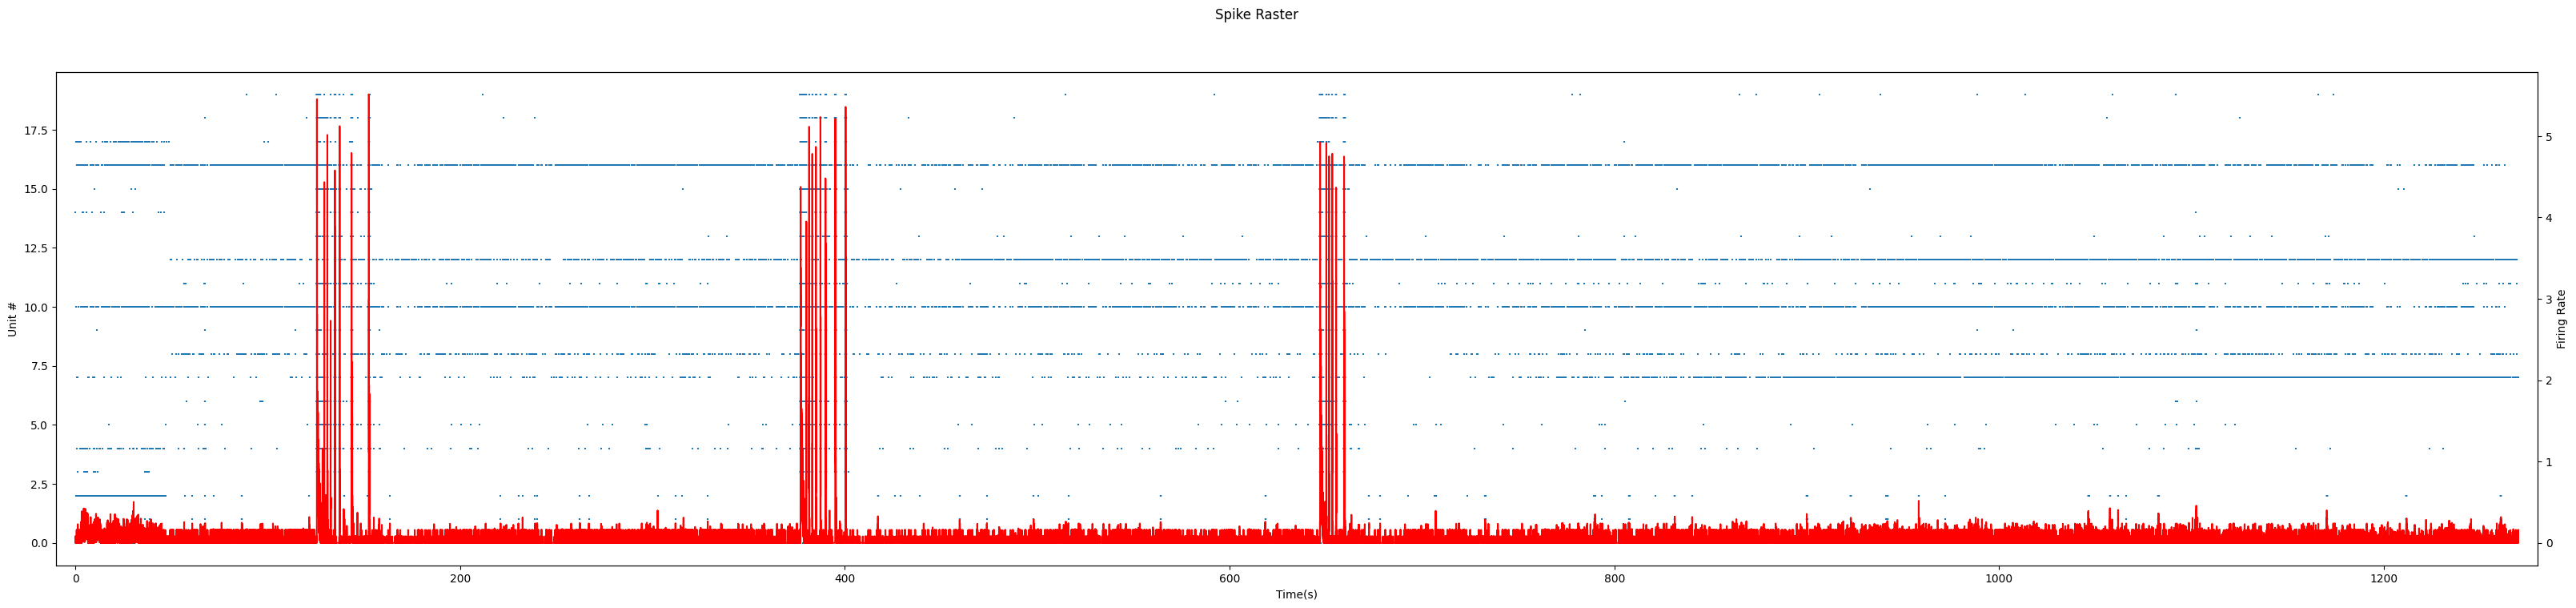

In [4]:
plot_raster(sd, title="Spike Raster", xsize=40, ysize=8)
plot_raster(sd, title="Spike Raster", xsize=40, ysize=8, analize=True)

### Zooms

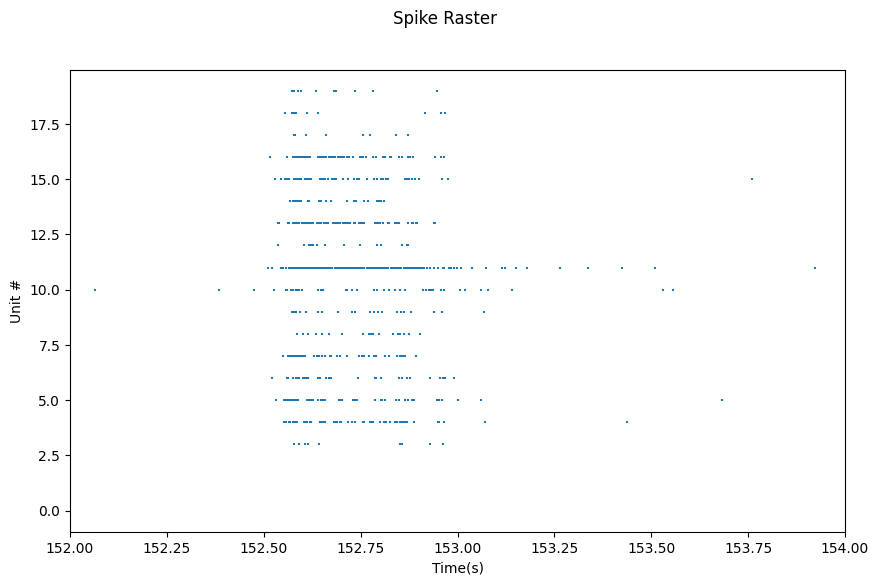

In [5]:
plot_raster(sd, title="Spike Raster", l1=152, l2=154)

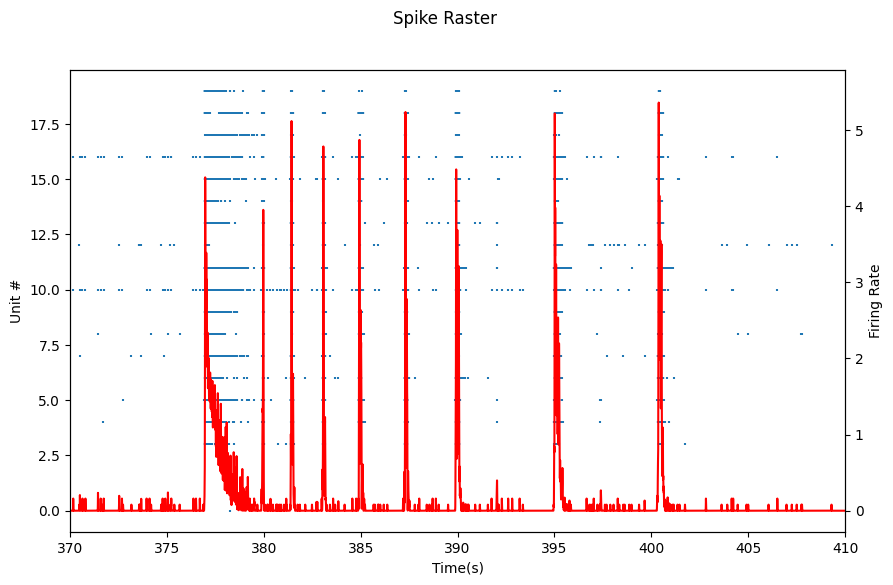

In [32]:
plot_raster(sd, title="Spike Raster", l1=370, l2=410, analize=True)

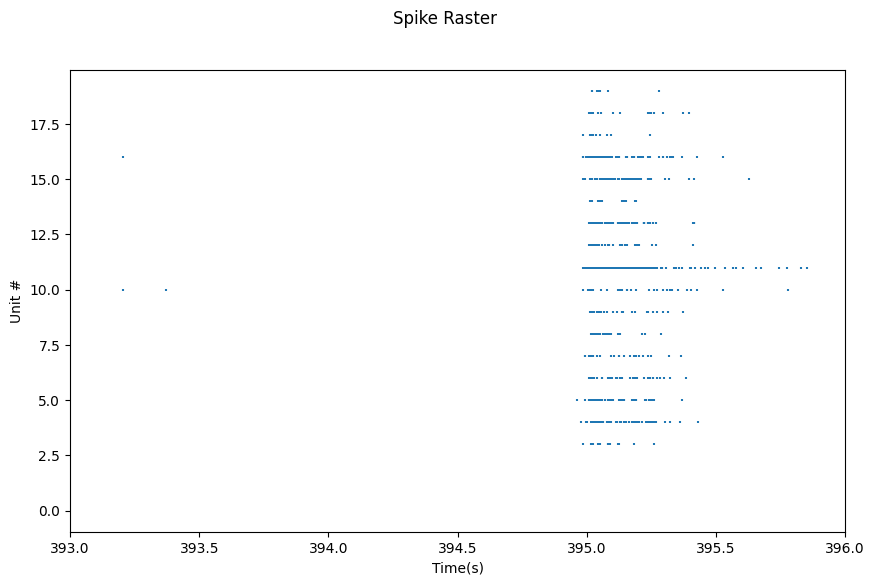

In [7]:
plot_raster(sd, title="Spike Raster", l1=393, l2=396)

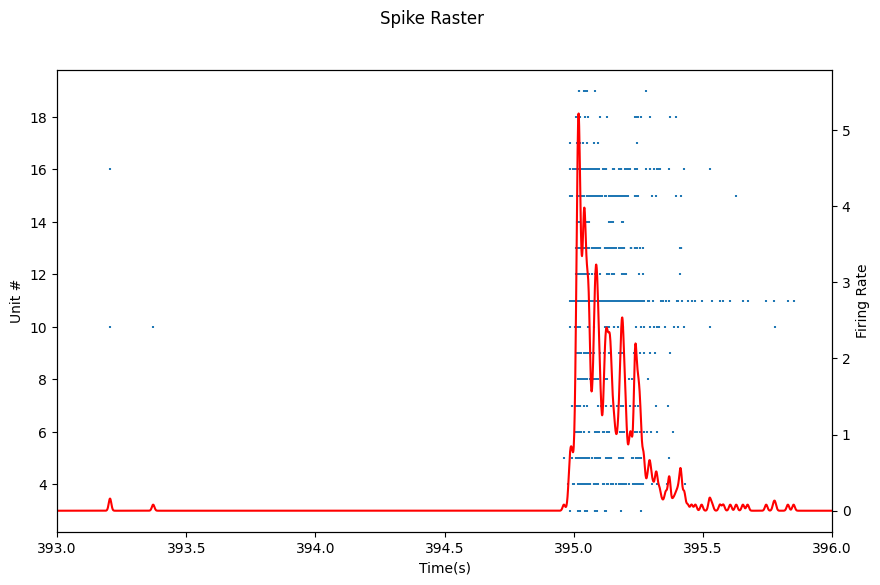

In [8]:
plot_raster(sd, title="Spike Raster", l1=393, l2=396, analize=True)

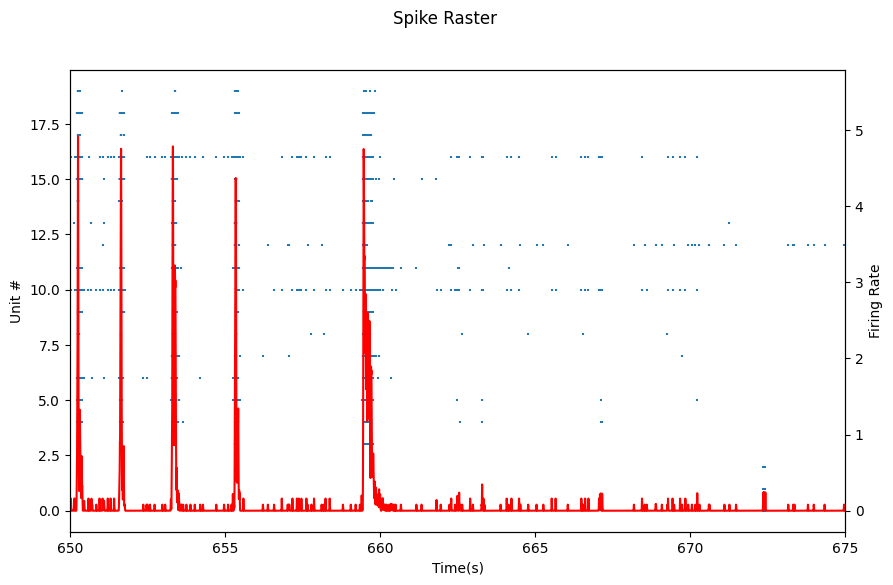

In [9]:
plot_raster(sd, title="Spike Raster", l1=650, l2=675, analize=True)

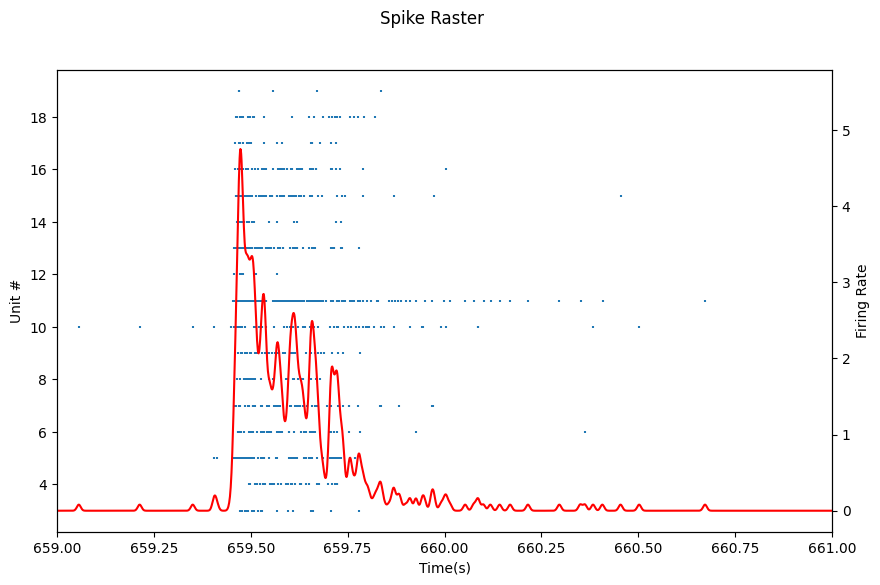

In [10]:
plot_raster(sd, title="Spike Raster", l1=659, l2=661, analize=True)

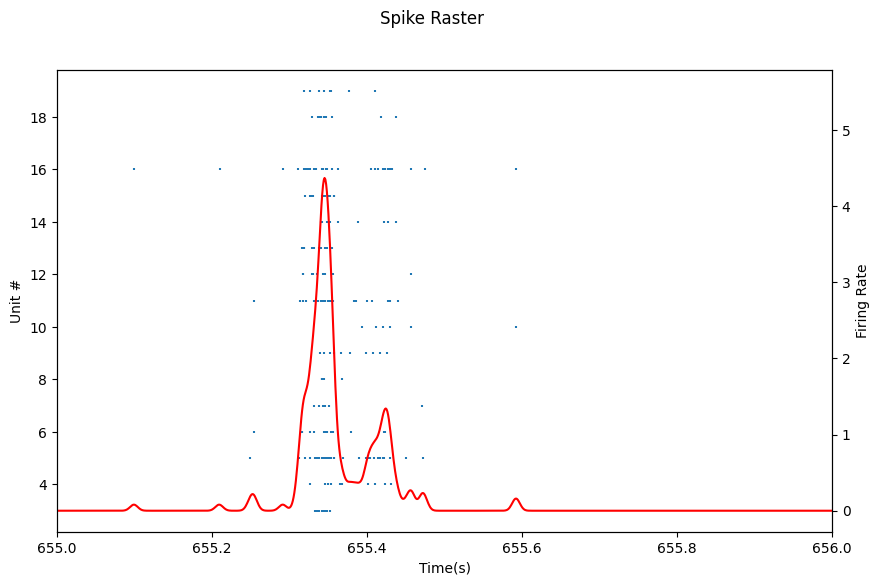

In [11]:
plot_raster(sd, title="Spike Raster", l1=655, l2=656, analize=True)

## Corrs

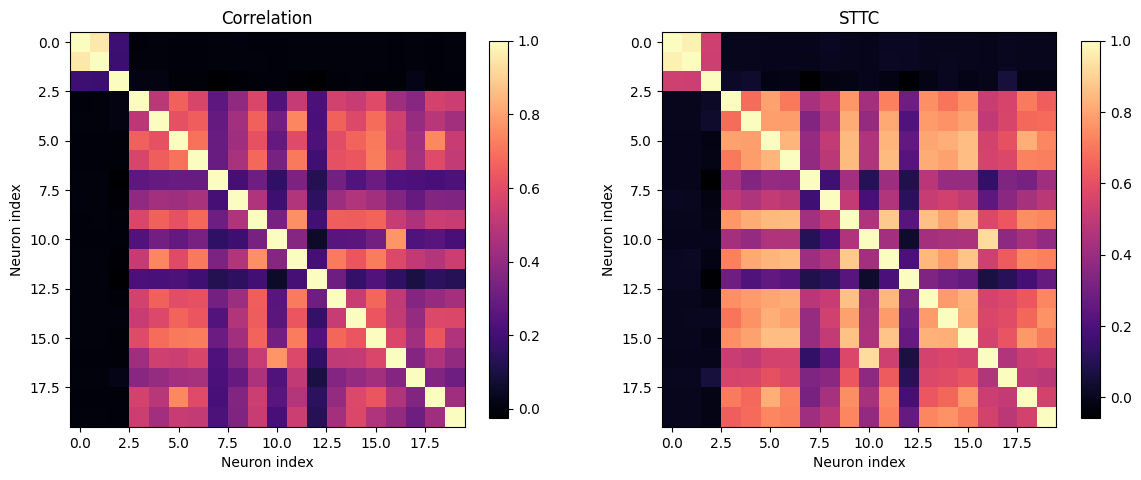

In [9]:
corrMethPlots(Corr, STTC)

Text(0.5, 1.0, 'Original STTC')

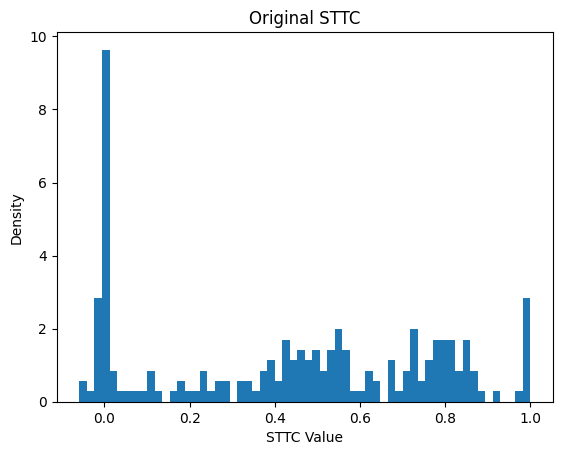

In [29]:
flatSTTC = STTC.flatten()
plt.hist(flatSTTC, density=True, bins=60)
plt.xlabel("STTC Value")
plt.ylabel("Density")
plt.title("Original STTC")

## Eigen Stuff

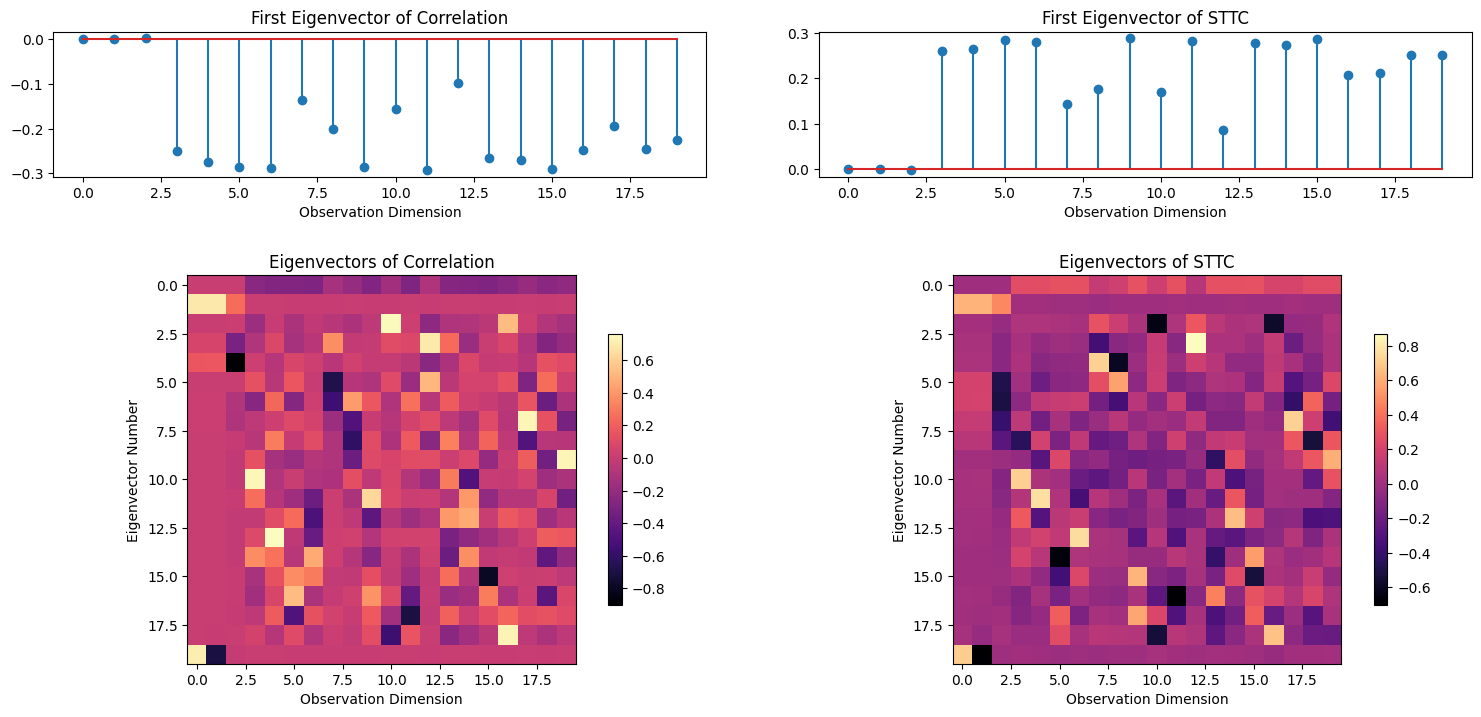

In [25]:
EigenvectorAnalysis(Ucorr, Usttc)

<font color="red">This doesn't really tell us much:

Text(0.5, 1.0, 'Original STTC')

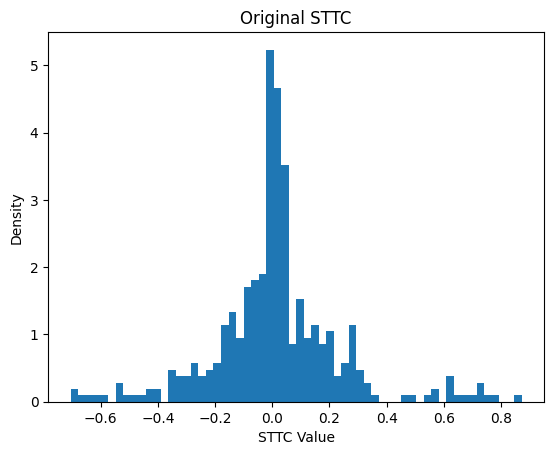

In [28]:
flatUSTTC = Usttc.flatten()
plt.hist(flatUSTTC, density=True, bins=60)
plt.xlabel("STTC Value")
plt.ylabel("Density")
plt.title("Original STTC")

### <font color="blue">Layouts

In [23]:
interact_manual(EigenDirection, sd=sds, selection=(0,10))

interactive(children=(Dropdown(description='sd', options={'Analysis--2022-10-20-e-': <braingeneers.analysis.an…

<function __main__.EigenDirection(sd, selection)>

In [24]:
interact_manual(EigenLayoutsDisplay, sd=sds, showamount=(0,10))

interactive(children=(Dropdown(description='sd', options={'Analysis--2022-10-20-e-': <braingeneers.analysis.an…

<function __main__.EigenLayoutsDisplay(sd, showamount=5)>